# PART 2 -TESTING 


In [36]:
import pandas as pd
import numpy as np
from sklearn  import datasets,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sn
import pickle as pk
from matplotlib.pyplot import subplots, show

In [37]:
test1=pd.read_csv('group4_test',header=None,)
test=np.array(test1)
trows=test.shape[0]#GETTING THE X VARIABLES 
tcolumns=test.shape[1]-1 #GETTING THE Y VARIABLES 
tsensor=test[:,0:tcolumns]#x
trooms=test[:,tcolumns].reshape(trows,1)



In [38]:
logmm=pk.load(open('logm','rb'))
nnn=pk.load(open('nn_model', 'rb'))
ss=pk.load(open('scal', 'rb'))

In [40]:
tsensor=ss.fit_transform(tsensor)

# LOGISTIC REGRESSION PART


Classification report 
 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99       146
           2       0.95      0.95      0.95       156
           3       0.91      0.93      0.92       129
           4       0.99      0.99      0.99       169

   micro avg       0.96      0.96      0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600


ACCURACY : 95.84 %

CONFUSION MATRIX


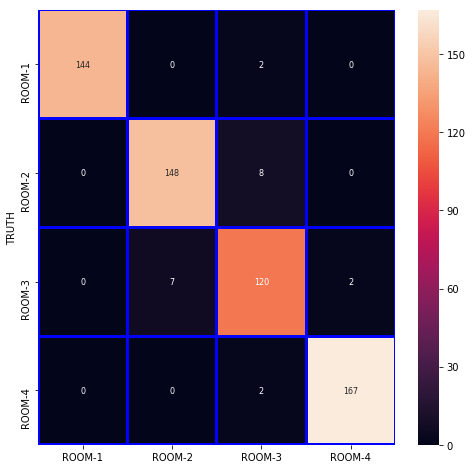

In [44]:
tpred=logmm.predict(tsensor)
roms=['ROOM-1','ROOM-2','ROOM-3','ROOM-4']
romz=[1,2,3,4]
accu=cross_val_score(logmm,tsensor,(np.ravel(trooms)),cv=10,scoring="accuracy")
conf=confusion_matrix(np.ravel(trooms),tpred)


cm=conf
corrDec= cm.sum(axis=1)#add all  rows in metr True postive
cm = cm.astype('float') / corrDec[:, np.newaxis] # reshape to vertical row 
perClassAcc= cm.diagonal()



plt.figure(figsize=(8,8))
sn.heatmap(conf, annot=True, annot_kws={"size": 8},fmt="d", linewidths=2,linecolor='b',xticklabels=roms,yticklabels=roms)
plt.ylabel("TRUTH")
#plt.xlabel("PREDICTED")
print("")
print("==================================================================================")
print("Classification report",'\n','\n',classification_report(np.ravel(trooms),tpred,labels=romz))
print("")
print("==================================================================================")
print("=========")
print("ACCURACY :",round(cross_val_score(logmm,tsensor,(np.ravel(trooms)),cv=5,scoring="accuracy").mean()*100,2),"%")
print("==============================")
print("==================================================================================")     
print("")
print("=================")
print("CONFUSION MATRIX")
print("=================")

 


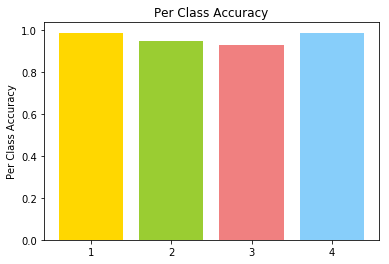

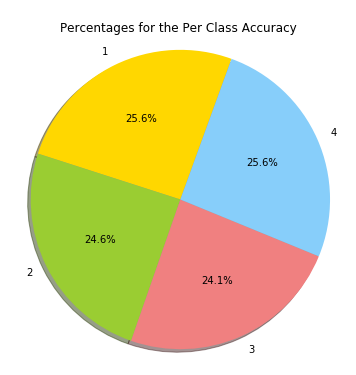

In [45]:
objects = ('1', '2', '3', '4')
y_pos = np.arange(len(objects))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.bar(y_pos, perClassAcc, color = colors)
plt.xticks(y_pos, objects)
#plt.xlabel('Class')
plt.ylabel('Per Class Accuracy')
plt.title('Per Class Accuracy')
plt.show()
#print("===========================pie chart==================================") 
explode = (0.1, 0, 0,0)  # explode 1st slice
plt.figure(figsize=(6,6))
plt.title("\nPercentages for the Per Class Accuracy")
plt.pie(perClassAcc, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=70)
plt.axis('equal')
plt.show()

**SAVING OUR MODEL ONCE AGAIN IN ORDER TO BE ABLE TO USE IN IN THE DEMOATRATION FILE**

# NEURAL-NETWORK 

************************************************************************************************
Report : 
              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99       146
         2.0       0.99      0.96      0.97       156
         3.0       0.93      0.97      0.95       129
         4.0       0.98      0.98      0.98       169

   micro avg       0.97      0.97      0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.97      0.98       600

************************************************************************************************
Accuracy Score : 97.5 %
************************************************************************************************


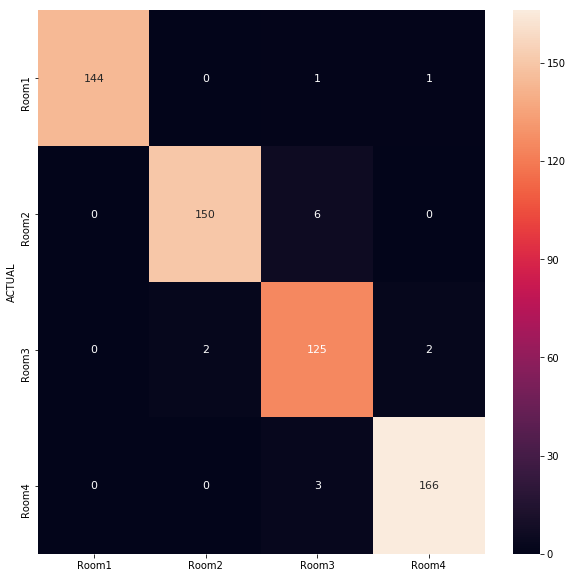

In [47]:
#print("===========================F1 score table==================================") 
actual=np.ravel(trooms)
predicted=nnn.predict(tsensor) 
predicted=np.ravel(predicted)

print("************************************************************************************************") 
print('Report : ')
print(classification_report(actual, predicted) )
results = confusion_matrix(actual, predicted) 
print("************************************************************************************************") 
print('Accuracy Score :',round(accuracy_score(actual, predicted).mean()*100,2),"%")
print("==============================")
print("************************************************************************************************") 
cm=results

corrDec= cm.sum(axis=1)#add all  rows in metr True postive
cm = cm.astype('float') / corrDec[:, np.newaxis] # reshape to vertical row 
perClassAcc= cm.diagonal()
#print("===========================Confusion matrix==================================") 
from matplotlib.pyplot import subplots, show
plt.figure(figsize=(10,10))
Room_class = ['Room1','Room2','Room3','Room4']
sn.heatmap(results, annot=True, annot_kws={"size": 11},fmt='d' ,xticklabels=Room_class, yticklabels=Room_class)

plt.ylabel("ACTUAL")
plt.xlabel="PREDICTED"
show()


# GRAPHICAL  DATA REPRESENTATION FOR NEURAL NETWORK

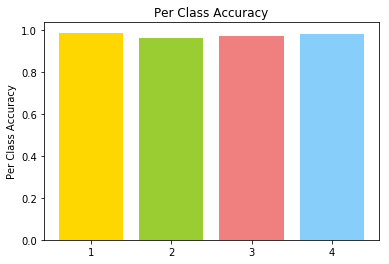

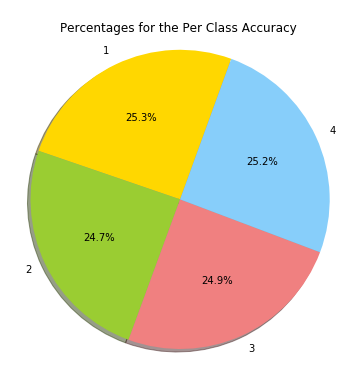

In [9]:
#print("===========================Bar Graph==================================") 
objects = ('1', '2', '3', '4')
y_pos = np.arange(len(objects))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.bar(y_pos, perClassAcc, color = colors)
plt.xticks(y_pos, objects)
#plt.xlabel('Class')
plt.ylabel('Per Class Accuracy')
plt.title('Per Class Accuracy')
plt.show()
#print("===========================pie chart==================================") 
explode = (0.1, 0, 0,0)  # explode 1st slice
plt.figure(figsize=(6,6))
plt.title("\nPercentages for the Per Class Accuracy")
plt.pie(perClassAcc, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=70)
plt.axis('equal')
plt.show()

# SUPPORT VECTOR MECHINE TESTING 

In [17]:
label = [1,2,3,4]
cunfm = confusion_matrix(trooms, ypred, labels = label)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cunfm

array([[145,   0,   1,   0],
       [  0, 148,   8,   0],
       [  1,   2, 124,   2],
       [  1,   0,   1, 167]])


CLASSIFICATION REPORT 
 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       146
           2       0.99      0.95      0.97       156
           3       0.93      0.96      0.94       129
           4       0.99      0.99      0.99       169

   micro avg       0.97      0.97      0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

ACCURACY : 97.01 %

CONFUSION MATRIX


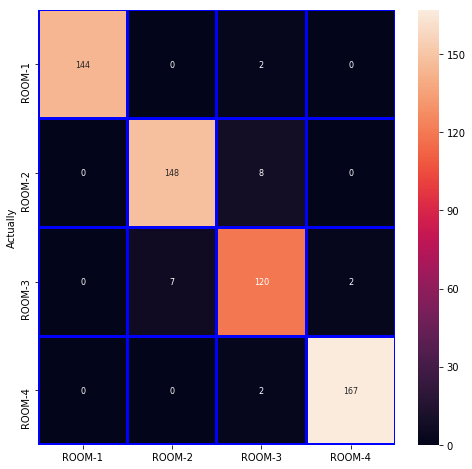

In [18]:
Filename = "SVMmode.pkl"
svm_model = pk.load(open(Filename,"rb"))
sco = svm_model.score(tsensor,np.ravel(trooms))

ypred = svm_model.predict(tsensor)
label = [1,2,3,4]

cm=cunfm
corrDec= cm.sum(axis=1)#add all  rows in metr True postive
cm = cm.astype('float') / corrDec[:, np.newaxis] # reshape to vertical row 
perClassAcc= cm.diagonal()

plt.figure(figsize = (8,8))
sn.heatmap(conf, annot=True, annot_kws={"size": 8},fmt="d", linewidths=2,linecolor='b',xticklabels=roms,yticklabels=roms) 
plt.ylabel("Actually")
#plt.xlabel("Predicted")
print()
print("=================================================")
print("CLASSIFICATION REPORT \n","\n============================","\n",classification_report(np.ravel(trooms), ypred, labels = [1,2,3,4]))
print("=================================================")
print("=================================================")
print("ACCURACY :",round(cross_val_score(svm_model,tsensor,(np.ravel(trooms)),cv=4,scoring="accuracy").mean()*100,2),"%")
print("==============================")
print("")
print("CONFUSION MATRIX")




# =================================================

# GRAPHICAL  DATA REPRESENTATION FOR SVM

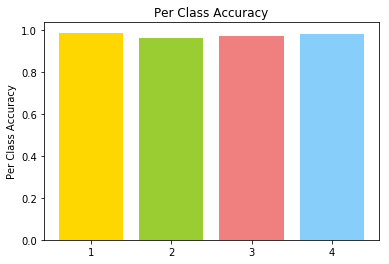

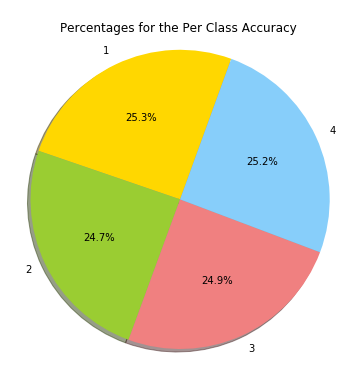

In [11]:
objects = ('1', '2', '3', '4')
y_pos = np.arange(len(objects))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.bar(y_pos, perClassAcc, color = colors)
plt.xticks(y_pos, objects)
#plt.xlabel('Class')
plt.ylabel('Per Class Accuracy')
plt.title('Per Class Accuracy')
plt.show()
#print("===========================pie chart==================================") 
explode = (0.1, 0, 0,0)  # explode 1st slice
plt.figure(figsize=(6,6))
plt.title("\nPercentages for the Per Class Accuracy")
plt.pie(perClassAcc, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=70)
plt.axis('equal')
plt.show()

# SAVING OUR MODELS 

In [48]:
pk.dump(logmm,open("finalmod",'wb'))
Filename = "SVMmodel"
pk.dump(svm_model, open(Filename,"wb"), pk.HIGHEST_PROTOCOL)
pk.dump(nnn,open('nn_model',"wb"))

